wet sand


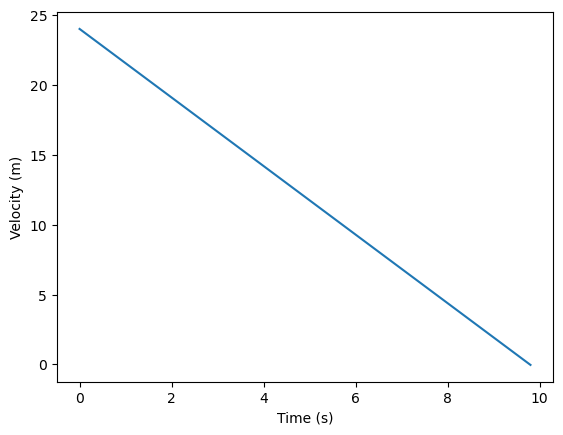

In [24]:
import math
import random
import matplotlib.pyplot as plt

def braking_distance(mass, velocity, road_type, weather, inclination, time_step=0.1, initial_distance=0):
  """
  Calculates the braking distance of a vehicle based on specified parameters.
  
  Parameters:
  - mass: mass of the vehicle in kg
  - velocity: initial velocity of the vehicle in m/s
  - road_type: type of road surface (e.g. ice, concrete, gravel)
  - weather: weather conditions (e.g. wet, dry)
  - inclination: incline of the road in degrees
  - time_step: time interval for the simulation in seconds (default: 0.1)
  - initial_distance: initial distance from the starting point in meters (default: 0)
  
  Returns:
  - A tuple containing:
    - A list of time values in seconds
    - A list of distance values in meters
  """
  # Calculate the coefficient of friction based on the road type and weather conditions
  if road_type == "ice":
    if weather == "wet":
      friction_coeff = 0.08
    else:
      friction_coeff = 0.15
    
  elif road_type == "concrete":
    if weather == "wet":
      friction_coeff = 0.35
    else:
      friction_coeff = 0.5
    
  elif road_type == "gravel":
    if weather == "dry":
      friction_coeff = 0.35
    else:
      friction_coeff = 0.3
  else:
    friction_coeff = 0.25 #ortalamasini alirsin

  # Calculate the acceleration due to GRAVITY
  GRAVITY = 9.81 #[m/s^2]
  
  # Convert the inclination to radians
  inclination_rad = inclination * (math.pi / 180)
  
  # Calculate the normal force
  normal_force = mass * GRAVITY * math.cos(inclination_rad) #Newton
  
  # Calculate the braking force
  braking_force = friction_coeff * normal_force

  # Set the initial time and distance
  t = 0
  d = initial_distance
  
  # Initialize lists to store the time and distance values
  time_values = [t]
  distance_values = [d]
  velocity_values =[velocity]
  
  # Run the simulation until the velocity is zero
  while velocity >= 0:
    # Calculate the acceleration
    acceleration = -braking_force / mass
    
    # Update the velocity and distance
    velocity += acceleration * time_step
    d += velocity * time_step
    
    # Update the time and store the time and distance values
    t += time_step
    time_values.append(t)
    velocity_values.append(velocity)
    distance_values.append(d)
    
  return time_values, distance_values, velocity_values

# Test the function

mass = random.randint(1000,2500)
initial_velocity = random.randint(10,90)
road_condition = ["concrete","gravel","ice","sand","water"]
surface_condition = ["dry","wet"]
road_selecter =random.randint(0,4)
surface_selecter =random.randint(0,1)

time_values, distance_values,velocity_values = braking_distance(mass, initial_velocity, road_condition[road_selecter],surface_condition[surface_selecter] , 0)

# Plot the results
plt.plot(time_values, velocity_values)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)")

print(surface_condition[surface_selecter],road_condition[road_selecter])


Text(0, 0.5, 'Distance (m)')

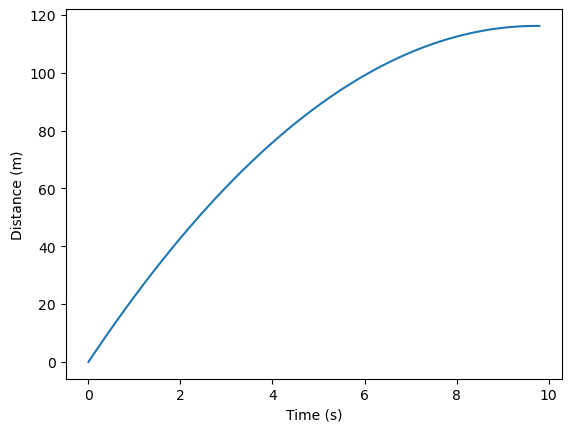

In [26]:
plt.plot(time_values, distance_values)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")